In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from helpers import load_dataset
import numpy as np

In [2]:
X_train, y_train, _, _, _, _ = load_dataset()

In [3]:
a = X_train[2, 0, :, :]
a.shape

(28, 28)

0.096874


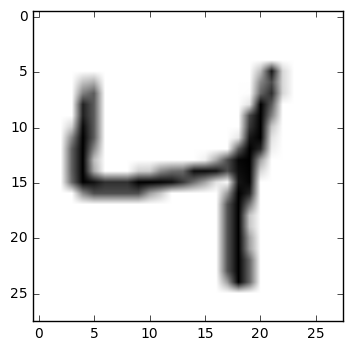

In [4]:
plt.imshow(a, cmap="gray_r")
print(a.mean())

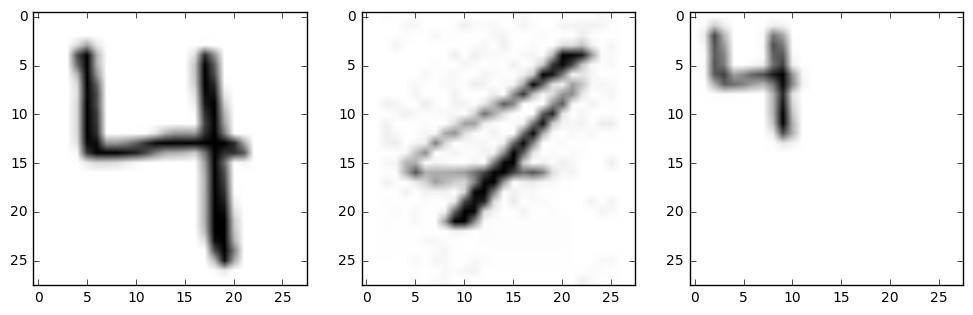

In [5]:
img_names=["my_four.tif",
          "my_four_fancy.tif",
          "my_four_small.tif"
          ]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for f, ax in zip(img_names, axes):
    im = mpimg.imread(f)
    ax.imshow(im, cmap="gray_r")

In [6]:
from predict import make_predictions
q = make_predictions()

Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


Prediction: 4: 4 (1.000000), 9 (0.000000), 7 (0.000000), 1 (0.000000), 5 (0.000000), 8 (0.000000), 2 (0.000000), 0 (0.000000), 6 (0.000000), 3 (0.000000), 
Prediction: 2: 2 (0.707865), 8 (0.175933), 7 (0.053020), 1 (0.030159), 4 (0.017013), 3 (0.010016), 9 (0.002968), 5 (0.001565), 6 (0.000880), 0 (0.000582), 
Prediction: 7: 7 (0.394680), 1 (0.229425), 2 (0.174708), 5 (0.072690), 3 (0.052864), 0 (0.027655), 4 (0.019611), 6 (0.014676), 8 (0.010455), 9 (0.003236), 


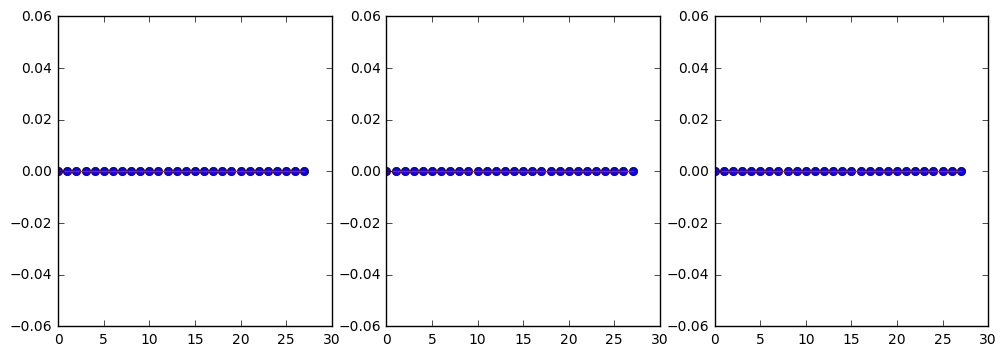

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for row, ax in zip(a, axes):
    ax.stem(row)

In [8]:
q

array([[  1.70841053e-17,   3.91843724e-10,   1.37978374e-13,
          9.61733781e-18,   1.00000000e+00,   2.95455609e-13,
          1.12375125e-17,   9.96115745e-10,   2.68637733e-13,
          3.35446981e-09],
       [  5.81548782e-04,   3.01588625e-02,   7.07865477e-01,
          1.00155789e-02,   1.70133170e-02,   1.56451866e-03,
          8.79966654e-04,   5.30195199e-02,   1.75932840e-01,
          2.96839373e-03],
       [  2.76554320e-02,   2.29425341e-01,   1.74708247e-01,
          5.28637096e-02,   1.96111985e-02,   7.26896077e-02,
          1.46755287e-02,   3.94679576e-01,   1.04554258e-02,
          3.23596015e-03]], dtype=float32)